# Week 22 Group Exercise -- Webscraping using BeautifulSoup

## 1. Use Splinter and/or Beautiful Soup to scrape https://www.dndbeyond.com/classes, and pull out all class names. Store these in a dataframe.
 

In [67]:
from bs4 import BeautifulSoup as bs
import requests

#need to look at terms and conditions to know if you can scrape the website
#most websites have a file called robots.txt that you can look at to see
#if scraping is allowed. ex: google.com/robots.txt
url = 'https://dnd.wizards.com/classes'

#I never could get dndbeyond to work for me, so I looked for a similar website and dnd.wizards seemed pretty
#close so I used that instead and it had no issues.

In [68]:
#get page with requests

response = requests.get(url, headers=headers)
response

<Response [200]>

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Drupal 7 (https://www.drupal.org)" name="generator"/>
  <link href="https://dnd.wizards.com/classes" rel="canonical"/>
  <link href="https://dnd.wizards.com/node/86" rel="shortlink"/>
  <meta content="width=device-width, user-scalable=no, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://dnd.wizards.com/sites/all/themes/dx/icons/favicon_.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <link href="https://dnd.wizards.com/sites/all/themes/dx/icons/touch-icon-114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="https://dnd.wizards.com/sites/all/themes/dx/icons/touch-icon-57.png" rel="apple-touch-icon-precomposed"/>
  <link href="https://dnd.wizards.com/sites/all/themes/dx/icons/touch-icon-72.png" rel="apple-touch-icon-precomposed" si
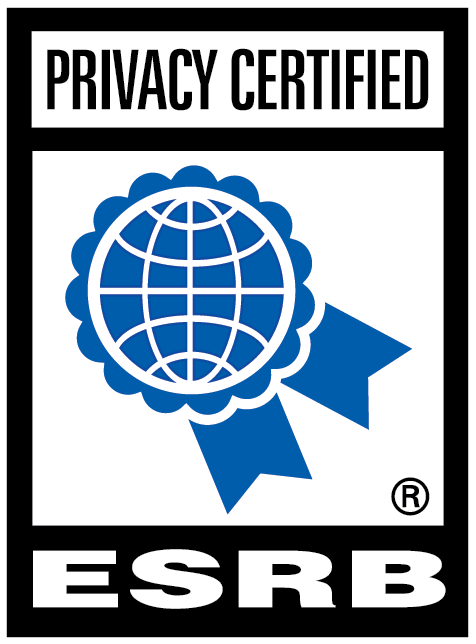

In [69]:
soup = bs(response.text, 'html.parser')
print(soup.prettify())

In [70]:
print(soup.title)

<title>Classes | Dungeons &amp; Dragons</title>


In [71]:
all_divs = soup.find_all('div',class_='item-content')
all_divs[1]

<div class="item-content">
<h2><span>Wizard</span></h2>
<div class="details">
<div class="description">
<p>Drawing on the subtle weave of magic that permeates the cosmos, wizards cast spells of explosive fire, arcing lightning, subtle deception, and brute-force mind control. 
</p>
</div>
<p class="actions"><a class="cta-button" href="/dungeons-and-dragons/what-is-dnd/classes/wizard" target="">Learn More About Wizards</a></p>
</div>
</div>

In [72]:
import pandas as pd
class_name_list = []
class_detail_url_list = []
for div in all_divs:
    try:
        class_name = div.find('span').text
        class_name_list.append(class_name)
        
        class_detail_element = div.find('a', class_='cta-button')
        if class_detail_element:
            class_detail_url_list.append(class_detail_element['href'])
        else:
            class_detail_url_list.append('None available')
        #print(class_detail_url_list)
    except AttributeError as e:
        print(e)
class_df = pd.DataFrame(class_name_list)
class_df.columns=['Class Names']
class_df

,Class Names
0,Fighter
1,Wizard
2,Cleric
3,Rogue
4,Ranger
5,Other Classes


## 2. Now, alter 1 to click on each class name to go to the more detailed page, and pull out the first paragraph about each class. Store these in a dataframe. Your dataframe should have two columns.

### Trying to pull out the intro paragraph for just one class to make sure I can get everything to work.

In [73]:
#I tried with wizards and got that working, but noticed the rangers kept returning no text. So I played around 
#with it and discovered that there is inconsistent formatting on the website. The first paragraph for rangers
#was empty, so I added an if statement to indicate if there is no text, to go on to the next paragraph.

response = requests.get('https://dnd.wizards.com/' + class_detail_url_list[4])
#print(response)

soup = bs(response.text, 'html.parser')
#print(soup.prettify())

paragraph = soup.find('article', class_='intro')
paragraph

all_paragraphs = paragraph.find_all('p')
#print(all_paragraphs)
print(all_paragraphs[1].text)
if all_paragraphs[1].text.isspace():
    x = all_paragraphs[2].text

#all_paragraphs[2].text

#https://dnd.wizards.com/dungeons-and-dragons/what-is-dnd/classes/cleric


### Scaling up what I did above to pull the first paragraph that contains text for all classes listed. There are 5 classes given on this website and one for "Other Classes". Other classes does not have any additional information, so I added lines to store that as "None available" for the first paragraph.

In [74]:
#instatiating a list to hold the paragraphs
class_details_list = []

#cycling through the url list I made in Q1 (could have done that here instead,
#but that made more sense to me)

for url in class_detail_url_list:
   
    #For "other classes", there is no other page with information, so I stored that as 'None available'
    #in my class_detail_url_list from Q1. So I include an if statement to check for that. If that is
    #the case, I append 'None available' for my final list of intros.
    if url == 'None available':
        class_details_list.append('None available')
     
    #All other cases have another page with text available.
    else:
        #I found that I needed to include the base url or else I couldn't get the code to work.
        response = requests.get('https://dnd.wizards.com/' + url)
        soup = bs(response.text, 'html.parser')
      
        try:
            paragraphs = soup.find('article',class_='intro')
            all_paragraphs = paragraphs.find_all('p') 
            
            #This addresses the scenario in the previous cell where Rangers formatting is different
            #and the 1st "intro" paragraph is empty. I am just indicating that if there's no text, try
            #the next indexed paragraph
            if all_paragraphs[1].text.isspace():
                intros = all_paragraphs[2].text
                
            else:
                intros = all_paragraphs[1].text
            class_details_list.append(intros)
            
        except AttributeError as e:
            print(e)
        
#Merging the intro paragraphs with the dataframe I created from Q1.
class_df['Intros'] = class_details_list    

class_df


,Class Names,Intros
0,Fighter,Perhaps the most diverse class of characters i...
1,Wizard,"Wizards are supreme magic-users, defined and u..."
2,Cleric,"When a cleric takes up an adventuring life, it..."
3,Rogue,Every town and city has its share of rogues. M...
4,Ranger,Though a ranger might make a living as a hunte...
5,Other Classes,None available
